In [1]:
#import basics
import sys
import os
import numpy as np
import pandas as pd
from scipy import stats
basedir='/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/'


#import the relevant synthesis tools
path = basedir + 'synthesis'
sys.path.insert(0,path)
from spacial_tools import moments_method as mm
from basic_grid_tools import plot_grid

path = basedir + 'field_info'
sys.path.insert(0,path)
from format_field import get_field_df

# Get the beam

In [2]:
#load what's needed
path= basedir + 'tracker_info'
sys.path.append(path)
from beam_moments import *
from transform_beam import *
from beam_moments import get_normalized_distribution_moments as gndm

In [3]:
#for now, import a single file to represent all of run 1
tracker_file = basedir + 'tracker_info/sample_data/beamSpot.txt'
#get the raw info
df_tr = get_df_tracker(file=tracker_file)

apply all corrections to the tracker data

In [4]:
from apply_tracker_corrections import basic_tracker_correction

In [5]:
df_tr_cor = basic_tracker_correction(df_tr)

applying shift
applying station avg
no acceptance corrections right now
no deconvolution right now


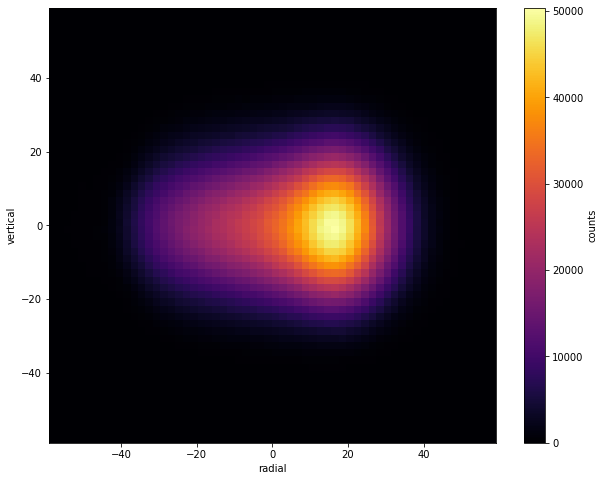

In [6]:
plot_grid(df=df_tr_cor,xvar='radial',yvar='vertical',zvar='counts')

In [7]:
x = df_tr_cor['radial']
y = df_tr_cor['vertical']
weights = df_tr_cor['counts']
N_moments = 5
I_norm, J_norm = gndm(N_moments,x,y,weights)
print(I_norm)
print(J_norm)

[1.00000000e+00 1.27368314e-01 9.81133617e-02 1.30311712e-04
 3.98041497e-03]
[0.         0.00338226 0.0016475  0.00127479 0.00016763]


In [8]:
x = df_tr['radial']
y = df_tr['vertical']
weights = df_tr['counts']
I_norm, J_norm = gndm(N_moments,x,y,weights)
print(I_norm)
print(J_norm)

[1.         0.1713641  0.11139036 0.01343988 0.00516043]
[0.         0.00338226 0.00196404 0.00151556 0.00045011]


# Field

Load what's needed

In [9]:
#import the relevant field moments functions
path = basedir + 'field_info'
sys.path.insert(0,path)
from format_field import field_team_to_standard_moments as ftts

calculate the moments for each file

In [10]:
# path = basedir + 'field_info/data/run1/limited_multipoles/'
# flist = ['60Hr_Average_Comparison_all_3956_3997_norescut_NoAvg_both.pkl',
# '9day_Average_Comparison_all_4138_4181_norescut_NoAvg_both.pkl',
# '9day_Average_Comparison_all_4189_4226_norescut_NoAvg_both.pkl',
# '9day_Average_Comparison_all_4226_4265_norescut_NoAvg_both.pkl',
# '9day_Average_Comparison_all_4265_4493_norescut_NoAvg_both.pkl',
# 'endgame_Average_Comparison_all_5054_5103_norescut_NoAvg_both.pkl',
# 'endgame_Average_Comparison_all_5117_5157_norescut_NoAvg_both.pkl',
# 'endgame_Average_Comparison_all_5169_5217_norescut_NoAvg_both.pkl',
# 'endgame_Average_Comparison_all_5217_5259_norescut_NoAvg_both.pkl',
# 'HighKick_Average_Comparison_all_4058_4098_norescut_NoAvg_both.pkl',
# 'HighKick_Average_Comparison_all_4098_4138_norescut_NoAvg_both.pkl'
# ]

# c_arr = np.empty(0)
# s_arr = np.empty(0)
# ec_arr = np.empty(0)
# es_arr = np.empty(0)
# for f in flist:
#     df = pd.read_pickle(path + f)
#     total_ctags = df["ctags"].sum()
#     b = [
#         (df["D"]*df["ctags"]).sum()/total_ctags,
#         (df["NQ"]*df["ctags"]).sum()/total_ctags,
#         (df["SQ"]*df["ctags"]).sum()/total_ctags,
#         (df["NS"]*df["ctags"]).sum()/total_ctags
#         ]
#     eb = [
#         (df["eD"]*df["ctags"]).sum()/total_ctags,
#         (df["eNQ"]*df["ctags"]).sum()/total_ctags,
#         (df["eSQ"]*df["ctags"]).sum()/total_ctags,
#         (df["eNS"]*df["ctags"]).sum()/total_ctags
#     ]    
#     c,s = ftts(b)
#     c_arr = np.append(c_arr,c)
#     s_arr = np.append(s_arr,s)
    
#     ec,es = ftts(eb)
#     ec_arr = np.append(ec_arr,ec)
#     es_arr = np.append(es_arr,es)

In [11]:
path = basedir + 'field_info/data/run1/all_multipoles/run1_v00/'
flist = ['60Hr_vals_uncertainties_3956-3997.pkl',
'HighKick_vals_uncertainties_4058-4098.pkl',
'HighKick_vals_uncertainties_4098-4138.pkl',
'9day_vals_uncertainties_4138-4181.pkl',
'9day_vals_uncertainties_4226-4265.pkl',
'9day_vals_uncertainties_4265-4493.pkl',
'endgame_vals_uncertainties_5054-5103.pkl',
'endgame_vals_uncertainties_5117-5157.pkl',
'endgame_vals_uncertainties_5169-5217.pkl',
'endgame_vals_uncertainties_5217-5259.pkl']

'''
60 is unblinded

the rest are all blinded with the same blinding on the Dipole(+- ppm) through NS(+- 100ppb)

high kick is issue free

missingong one of the 9 days, the one with the tying one 
'''

c_arr = np.empty(0)
s_arr = np.empty(0)
ec_arr = np.empty(0)
es_arr = np.empty(0)
c_flat_arr = np.empty(0)
s_flat_arr = np.empty(0)
ec_flat_arr = np.empty(0)
es_flat_arr = np.empty(0)
c_raw_arr = np.empty(0)
s_raw_arr = np.empty(0)
ec_raw_arr = np.empty(0)
es_raw_arr = np.empty(0)
for f in flist:
    df = pd.read_pickle(path + f)
    total_ctags = df["ctags"].sum()
    #get b
    b = [
        (df["D"]*df["ctags"]).sum()/total_ctags,
        (df["NQ"]*df["ctags"]).sum()/total_ctags,
        (df["SQ"]*df["ctags"]).sum()/total_ctags,
        (df["NS"]*df["ctags"]).sum()/total_ctags,
        (df["SS"]*df["ctags"]).sum()/total_ctags,
        (df["NO"]*df["ctags"]).sum()/total_ctags,
        (df["NO"]*df["ctags"]).sum()/total_ctags,
        (df["ND"]*df["ctags"]).sum()/total_ctags,
        (df["ND"]*df["ctags"]).sum()/total_ctags]
    #get eb
    df["varD"] = df["eD"]**2
    df["varNQ"] = df["eNQ"]**2
    df["varSQ"] = df["eSQ"]**2
    df["varNS"] = df["eNS"]**2
    df["varSS"] = df["eSS"]**2
    df["varNO"] = df["eNO"]**2
    df["varSO"] = df["eSO"]**2
    df["varND"] = df["eND"]**2
    df["varSD"] = df["eSD"]**2
    var_b = [
        (df["varD"]*df["ctags"]).sum()/total_ctags,
        (df["varNQ"]*df["ctags"]).sum()/total_ctags,
        (df["varSQ"]*df["ctags"]).sum()/total_ctags,
        (df["varNS"]*df["ctags"]).sum()/total_ctags,
        (df["varSS"]*df["ctags"]).sum()/total_ctags,
        (df["varNO"]*df["ctags"]).sum()/total_ctags,
        (df["varNO"]*df["ctags"]).sum()/total_ctags,
        (df["varND"]*df["ctags"]).sum()/total_ctags,
        (df["varND"]*df["ctags"]).sum()/total_ctags] 
    eb = [np.sqrt(v) for v in var_b]
    
    
    
  
    c,s = ftts(b)
    c_arr = np.append(c_arr,c)
    s_arr = np.append(s_arr,s)
    ec,es = ftts(eb)
    ec_arr = np.append(ec_arr,ec)
    es_arr = np.append(es_arr,es)
    
    ####################################################
    # For comparison, look at the non ctag averaged fields
    b_flat = [df["D"].mean(),
              df["NQ"].mean(),df["SQ"].mean(),
              df["NS"].mean(),df["SS"].mean(),
              df["NO"].mean(),df["SO"].mean(),
              df["ND"].mean(),df["SD"].mean()]
    eb_flat = [df["eD"].mean(),
          df["eNQ"].mean(),df["eSQ"].mean(),
          df["eNS"].mean(),df["eSS"].mean(),
          df["eNO"].mean(),df["eSO"].mean(),
          df["eND"].mean(),df["eSD"].mean()]
    c_flat,s_flat = ftts(b_flat)
    c_flat_arr = np.append(c_flat_arr,c_flat)
    s_flat_arr = np.append(s_flat_arr,s_flat)
    ec_flat,es_flat = ftts(eb_flat)
    ec_flat_arr = np.append(ec_flat_arr,ec_flat)
    es_flat_arr = np.append(es_flat_arr,es_flat)
        
    ##################################################   
    # Also for comparison, look at the averages from the full data (ie no dqc cuts)
    file = path + f
    #the output name is just the input with a different extension
    file = os.path.splitext(file)[0] + '.txt'    
    df_raw = get_field_df(file,n_multipoles=9)

    b_raw = [df_raw["D"].mean(),
          df_raw["NQ"].mean(),df_raw["SQ"].mean(),
          df_raw["NS"].mean(),df_raw["SS"].mean(),
          df_raw["NO"].mean(),df_raw["SO"].mean(),
          df_raw["ND"].mean(),df_raw["SD"].mean()]
    eb_raw = [df_raw["eD"].mean(),
          df_raw["eNQ"].mean(),df_raw["eSQ"].mean(),
          df_raw["eNS"].mean(),df_raw["eSS"].mean(),
          df_raw["eNO"].mean(),df_raw["eSO"].mean(),
          df_raw["eND"].mean(),df_raw["eSD"].mean()]
    c_raw,s_raw = ftts(b_raw)
    c_raw_arr = np.append(c_raw_arr,c_raw)
    s_raw_arr = np.append(s_raw_arr,s_raw)
    ec_raw,es_raw = ftts(eb_raw)
    ec_raw_arr = np.append(ec_raw_arr,ec_raw)
    es_raw_arr = np.append(es_raw_arr,es_raw)

In [12]:
c_arr

array([ 8.37764260e+02, -1.00577080e-01, -1.20467157e+00,  8.03280584e-03,
        6.91568658e-02,  8.38961015e+02, -3.10013874e-01, -1.18782785e+00,
        1.94562392e-02,  6.69537147e-02,  8.38761907e+02, -3.72697409e-01,
       -1.21375296e+00,  1.92949152e-02,  6.73554286e-02,  8.36996124e+02,
        2.51466905e-01, -1.34560557e+00,  1.89671323e-02,  6.82575747e-02,
        8.37362711e+02,  4.76324249e-01, -1.26456944e+00,  2.71086903e-02,
        4.46857082e-02,  8.36895648e+02,  7.58231977e-01, -1.26358734e+00,
        6.78177628e-03,  5.42313574e-02,  8.40009110e+02,  3.81305189e-01,
       -1.47332252e+00, -4.25708148e-03,  5.86744446e-02,  8.39930014e+02,
        2.72020846e-01, -1.48005221e+00,  4.25234094e-03,  5.30151491e-02,
        8.39728173e+02,  6.88734544e-01, -1.51335756e+00,  6.55059813e-03,
        4.97900916e-02,  8.39893712e+02,  3.87325169e-01, -1.48326204e+00,
        7.55237920e-03,  5.18535694e-02])

In [13]:
i=6
c_arr[i*N_moments:(i+1)*N_moments]

array([ 8.40009110e+02,  3.81305189e-01, -1.47332252e+00, -4.25708148e-03,
        5.86744446e-02])

### get and store the final result for each file

In [14]:
#will store each contribution
cI_arr = np.empty(0)
sJ_arr = np.empty(0)
ecI_arr = np.empty(0)
esJ_arr = np.empty(0)
#will store each full result
result_arr = np.empty(0)
eresult_arr = np.empty(0)
#loop over all the files
nfiles = len(flist)
for i in range(nfiles):
    print('----file',i,'----')
    print(flist[i], '\n')
    c=c_arr[i*N_moments:(i+1)*N_moments]
    s=s_arr[i*N_moments:(i+1)*N_moments]
    cI = c*I_norm
    sJ = s*J_norm
    result = mm(c,s,I_norm,J_norm)
    cI_arr = np.append(cI_arr,cI)
    sJ_arr = np.append(sJ_arr,sJ)
    result_arr = np.append(result_arr,result)
    
    ec=ec_arr[i*N_moments:(i+1)*N_moments]
    es=es_arr[i*N_moments:(i+1)*N_moments]
    ecI = ec*I_norm
    esJ = es*J_norm
    eresult = mm(ec,es,I_norm,J_norm,is_error=True)
    ecI_arr = np.append(ecI_arr,ecI)
    esJ_arr = np.append(esJ_arr,esJ)
    eresult_arr = np.append(eresult_arr,eresult)
    
    #print everything out
    print('normal: ',c,I_norm,cI,'\n')
    print('skew: ',s,J_norm,sJ,'\n')
    print('final result = ', result,'\n \n')

----file 0 ----
60Hr_vals_uncertainties_3956-3997.pkl 

normal:  [ 8.37764260e+02 -1.00577080e-01 -1.20467157e+00  8.03280584e-03
  6.91568658e-02] [1.         0.1713641  0.11139036 0.01343988 0.00516043] [ 8.37764260e+02 -1.72353010e-02 -1.34188797e-01  1.07959918e-04
  3.56879009e-04] 

skew:  [0.         0.25299367 0.33800526 0.00803281 0.06915687] [0.         0.00338226 0.00196404 0.00151556 0.00045011] [0.00000000e+00 8.55690851e-04 6.63856434e-04 1.21742040e-05
 3.11281028e-05] 

final result =  837.6148636896555 
 

----file 1 ----
HighKick_vals_uncertainties_4058-4098.pkl 

normal:  [ 8.38961015e+02 -3.10013874e-01 -1.18782785e+00  1.94562392e-02
  6.69537147e-02] [1.         0.1713641  0.11139036 0.01343988 0.00516043] [ 8.38961015e+02 -5.31252491e-02 -1.32312570e-01  2.61489450e-04
  3.45509807e-04] 

skew:  [0.         0.37540517 0.33572406 0.01945624 0.06695371] [0.         0.00338226 0.00196404 0.00151556 0.00045011] [0.00000000e+00 1.26971860e-03 6.59376072e-04 2.94871094

# The money plots

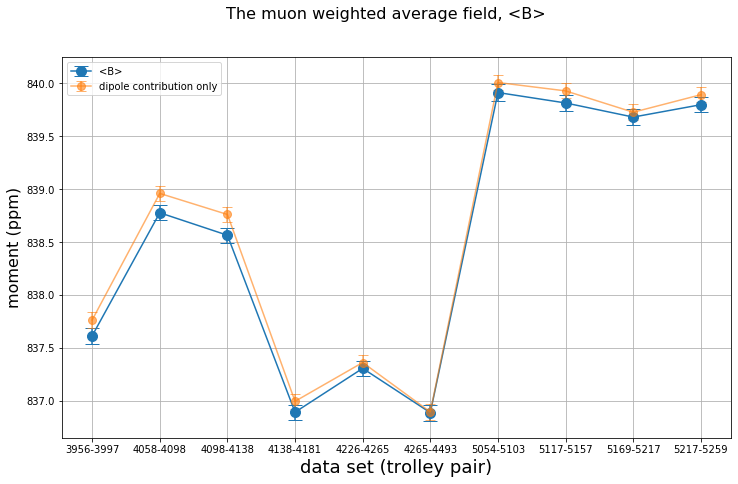

In [15]:

x = np.arange(len(flist))
x_names = ['3956-3997',
'4058-4098',
'4098-4138',
'4138-4181',
'4226-4265',
'4265-4493',
'5054-5103',
'5117-5157',
'5169-5217',
'5217-5259']


#the full result
y = result_arr
ey = eresult_arr
fig = plt.figure(figsize=(12,7))
plt.errorbar(x, y, ey, label='<B>',alpha=1,marker='o',markersize=10,capsize=7)

#the dipole
#remember that the cI and the c arrays are the same for the dipole term
y = cI_arr[0::N_moments]
ey = ecI_arr[0::N_moments]
plt.errorbar(x, y, ey, label='dipole contribution only',alpha=0.6,marker='o',markersize=8,capsize=5)

#the dipole with no ctags but with dqc cuts
# y = c_flat_arr[0::N_moments]
# ey = ec_flat_arr[0::N_moments]
# plt.errorbar(x, y, ey, label='flat dipole (no ctag weighting)',alpha=0.4,marker='o',linestyle='dashdot',markersize=5,capsize=3)


#the raw dipole (no ctags or dqc cuts)
# y = c_raw_arr[0::N_moments]
# ey = ec_raw_arr[0::N_moments]
# plt.errorbar(x, y, ey, label='raw dipole (no ctag weighting or dqc cuts)',alpha=0.4,marker='o',linestyle='dotted',markersize=5,capsize=3)

fig.suptitle('The muon weighted average field, <B>', fontsize=16)
plt.grid()
plt.xlabel('data set (trolley pair)', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()

plt.xticks(range(len(x_names)), x_names)
plt.show()

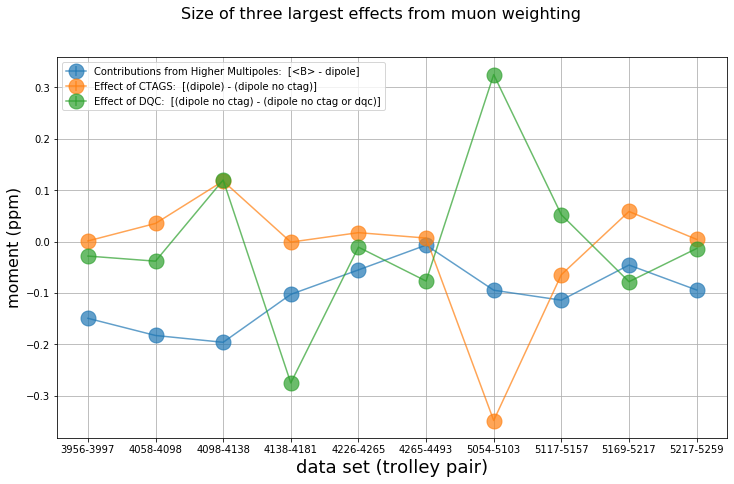

In [16]:
fig = plt.figure(figsize=(12,7))

#diff 1
#remember that the cI and the c arrays are the same for the dipole term
y = result_arr - cI_arr[0::N_moments]
plt.errorbar(x, y, 0, label='Contributions from Higher Multipoles:  [<B> - dipole]',alpha=0.7,marker='o',markersize=15)

#diff 2
y = cI_arr[0::N_moments] - c_flat_arr[0::N_moments]
plt.errorbar(x, y, 0, label='Effect of CTAGS:  [(dipole) - (dipole no ctag)]',alpha=0.7,marker='o',markersize=15)


#diff 3
y = c_flat_arr[0::N_moments] - c_raw_arr[0::N_moments]
plt.errorbar(x, y, 0, label='Effect of DQC:  [(dipole no ctag) - (dipole no ctag or dqc)]',alpha=0.7,marker='o',markersize=15)


fig.suptitle('Size of three largest effects from muon weighting', fontsize=16)
plt.grid()
plt.xlabel('data set (trolley pair)', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()

plt.xticks(range(len(x_names)), x_names)
plt.show()

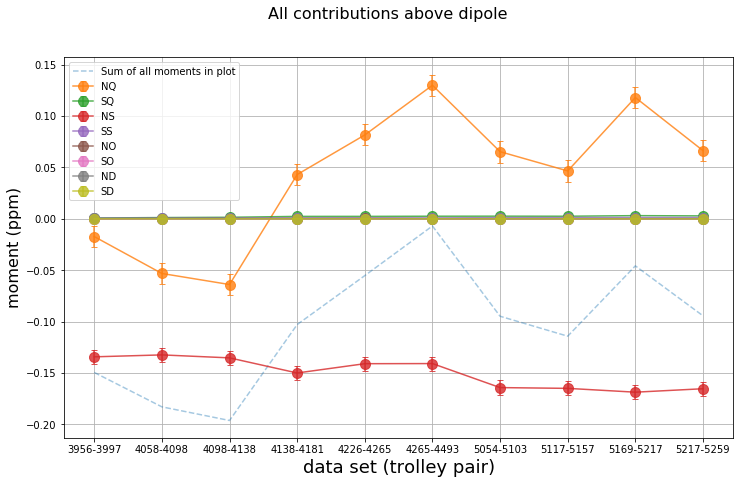

In [17]:
fig = plt.figure(figsize=(12,7))

#Total of NQ through the SD
y =  cI_arr[1::N_moments]+ cI_arr[2::N_moments] + cI_arr[3::N_moments] + cI_arr[4::N_moments]
y += sJ_arr[1::N_moments]+ sJ_arr[2::N_moments] + sJ_arr[3::N_moments] + sJ_arr[4::N_moments]
plt.plot(x, y, label='Sum of all moments in plot',alpha=0.4,marker='None',linestyle='--')


#Quadropole
y = cI_arr[1::N_moments]
ey = ecI_arr[1::N_moments]
plt.errorbar(x, y, ey, label='NQ',alpha=0.8,marker='o',markersize=10,capsize=3)

y = sJ_arr[1::N_moments]
ey = esJ_arr[1::N_moments]
plt.errorbar(x, y, ey, label='SQ',alpha=0.8,marker='o',markersize=10,capsize=3)

#Sextupole
y = cI_arr[2::N_moments]
ey = ecI_arr[2::N_moments]
plt.errorbar(x, y, ey, label='NS',alpha=0.8,marker='o',markersize=10,capsize=3)

y = sJ_arr[2::N_moments]
ey = esJ_arr[2::N_moments]
plt.errorbar(x, y, ey, label='SS',alpha=0.8,marker='o',markersize=10,capsize=3)

#Octopole
y = cI_arr[3::N_moments]
ey = ecI_arr[3::N_moments]
plt.errorbar(x, y, ey, label='NO',alpha=0.8,marker='o',markersize=10,capsize=3)

y = sJ_arr[3::N_moments]
ey = esJ_arr[3::N_moments]
plt.errorbar(x, y, ey, label='SO',alpha=0.8,marker='o',markersize=10,capsize=3)

#Decapole
y = cI_arr[4::N_moments]
ey = ecI_arr[4::N_moments]
plt.errorbar(x, y, ey, label='ND',alpha=0.8,marker='o',markersize=10,capsize=3)

y = sJ_arr[4::N_moments]
ey = esJ_arr[4::N_moments]
plt.errorbar(x, y, ey, label='SD',alpha=0.8,marker='o',markersize=10,capsize=3)


fig.suptitle('All contributions above dipole', fontsize=16)
plt.grid()
plt.xlabel('data set (trolley pair)', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()


plt.xticks(range(len(x_names)), x_names)

plt.show()

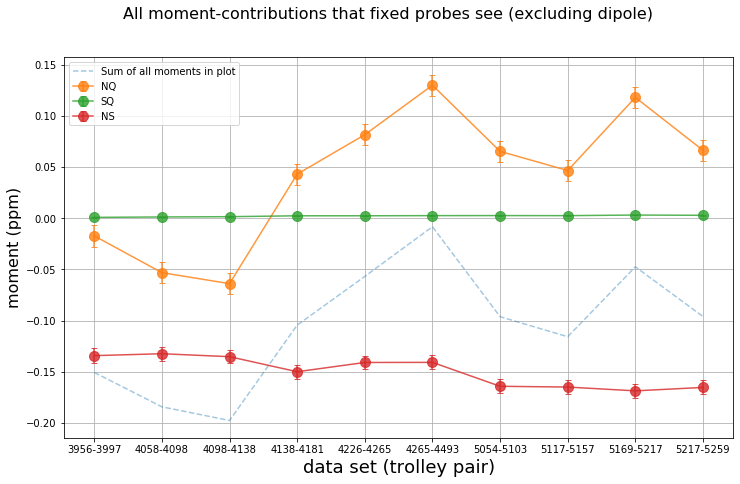

In [18]:
x = np.arange(len(flist))
fig = plt.figure(figsize=(12,7))



#Total of NQ through the SD
y =  cI_arr[1::N_moments]+ cI_arr[2::N_moments]
y += sJ_arr[1::N_moments]
plt.plot(x, y, label='Sum of all moments in plot',alpha=0.4,marker='None',linestyle='--')


#Quadropole
y = cI_arr[1::N_moments]
ey = ecI_arr[1::N_moments]
plt.errorbar(x, y, ey, label='NQ',alpha=0.8,marker='o',markersize=10,capsize=3)

y = sJ_arr[1::N_moments]
ey = esJ_arr[1::N_moments]
plt.errorbar(x, y, ey, label='SQ',alpha=0.8,marker='o',markersize=10,capsize=3)

#Sextupole
y = cI_arr[2::N_moments]
ey = ecI_arr[2::N_moments]
plt.errorbar(x, y, ey, label='NS',alpha=0.8,marker='o',markersize=10,capsize=3)



fig.suptitle('All moment-contributions that fixed probes see (excluding dipole)', fontsize=16)
plt.grid()
plt.xlabel('data set (trolley pair)', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()

plt.xticks(range(len(x_names)), x_names)
plt.show()

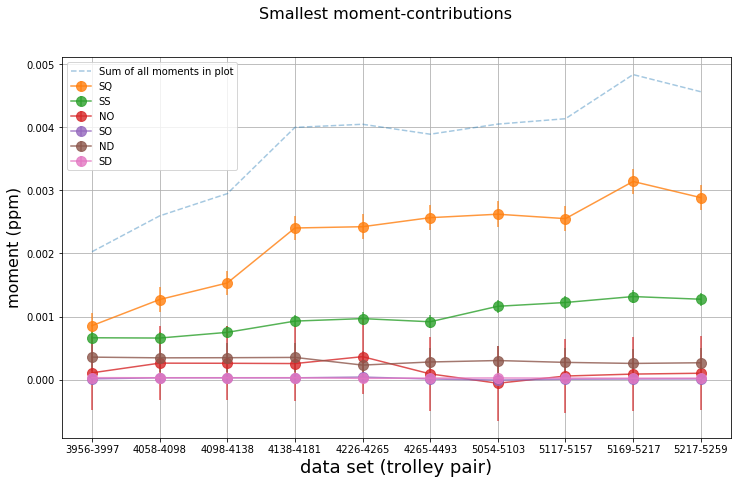

In [19]:
fig = plt.figure(figsize=(12,7))

#Total of NQ through the SD
y =  cI_arr[3::N_moments] + cI_arr[4::N_moments]
y += sJ_arr[1::N_moments]+ sJ_arr[2::N_moments] + sJ_arr[3::N_moments] + sJ_arr[4::N_moments]
plt.plot(x, y, label='Sum of all moments in plot',alpha=0.4,marker='None',linestyle='--')




#Quadropole
# y = cI_arr[1::N_moments]
# ey = ecI_arr[1::N_moments]
# plt.errorbar(x, y, ey, label='NQ',alpha=0.8,marker='o')

y = sJ_arr[1::N_moments]
ey = esJ_arr[1::N_moments]
plt.errorbar(x, y, ey, label='SQ',alpha=0.8,marker='o',markersize=10)

#Sextupole
# y = cI_arr[2::N_moments]
# ey = ecI_arr[2::N_moments]
# plt.errorbar(x, y, ey, label='NS',alpha=0.8,marker='o')

y = sJ_arr[2::N_moments]
ey = esJ_arr[2::N_moments]
plt.errorbar(x, y, ey, label='SS',alpha=0.8,marker='o',markersize=10)

#Octopole
y = cI_arr[3::N_moments]
ey = ecI_arr[3::N_moments]
plt.errorbar(x, y, ey, label='NO',alpha=0.8,marker='o',markersize=10)

y = sJ_arr[3::N_moments]
ey = esJ_arr[3::N_moments]
plt.errorbar(x, y, ey, label='SO',alpha=0.8,marker='o',markersize=10)

#Decapole
y = cI_arr[4::N_moments]
ey = ecI_arr[4::N_moments]
plt.errorbar(x, y, ey, label='ND',alpha=0.8,marker='o',markersize=10)

y = sJ_arr[4::N_moments]
ey = esJ_arr[4::N_moments]
plt.errorbar(x, y, ey, label='SD',alpha=0.8,marker='o',markersize=10)


fig.suptitle('Smallest moment-contributions', fontsize=16)
plt.grid()
plt.xlabel('data set (trolley pair)', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()

plt.xticks(range(len(x_names)), x_names)
plt.show()

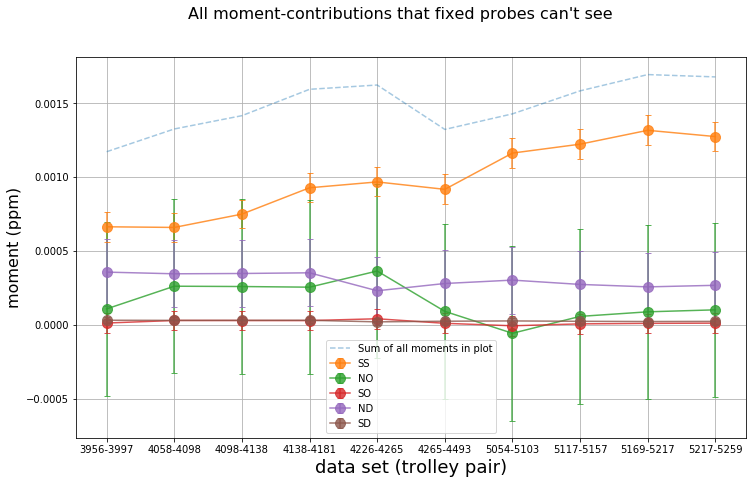

In [20]:

fig = plt.figure(figsize=(12,7))

#Total of NQ through the SD
y =  cI_arr[3::N_moments] + cI_arr[4::N_moments]
y += sJ_arr[2::N_moments] + sJ_arr[3::N_moments] + sJ_arr[4::N_moments]
plt.plot(x, y, label='Sum of all moments in plot',alpha=0.4,marker='None',linestyle='--')


#Quadropole
# y = cI_arr[1::N_moments]
# ey = ecI_arr[1::N_moments]
# plt.errorbar(x, y, ey, label='NQ',alpha=0.8,marker='o')

# y = sJ_arr[1::N_moments]
# ey = esJ_arr[1::N_moments]
# plt.errorbar(x, y, ey, label='SQ',alpha=0.8,marker='o')

#Sextupole
# y = cI_arr[2::N_moments]
# ey = ecI_arr[2::N_moments]
# plt.errorbar(x, y, ey, label='NS',alpha=0.8,marker='o')

y = sJ_arr[2::N_moments]
ey = esJ_arr[2::N_moments]
plt.errorbar(x, y, ey, label='SS',alpha=0.8,marker='o',markersize=10,capsize=3)

#Octopole
y = cI_arr[3::N_moments]
ey = ecI_arr[3::N_moments]
plt.errorbar(x, y, ey, label='NO',alpha=0.8,marker='o',markersize=10,capsize=3)

y = sJ_arr[3::N_moments]
ey = esJ_arr[3::N_moments]
plt.errorbar(x, y, ey, label='SO',alpha=0.8,marker='o',markersize=10,capsize=3)

#Decapole
y = cI_arr[4::N_moments]
ey = ecI_arr[4::N_moments]
plt.errorbar(x, y, ey, label='ND',alpha=0.8,marker='o',markersize=10,capsize=3)

y = sJ_arr[4::N_moments]
ey = esJ_arr[4::N_moments]
plt.errorbar(x, y, ey, label='SD',alpha=0.8,marker='o',markersize=10,capsize=3)




fig.suptitle("All moment-contributions that fixed probes can't see", fontsize=16)
plt.grid()
plt.xlabel('data set (trolley pair)', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()


plt.xticks(range(len(x_names)), x_names)
plt.show()

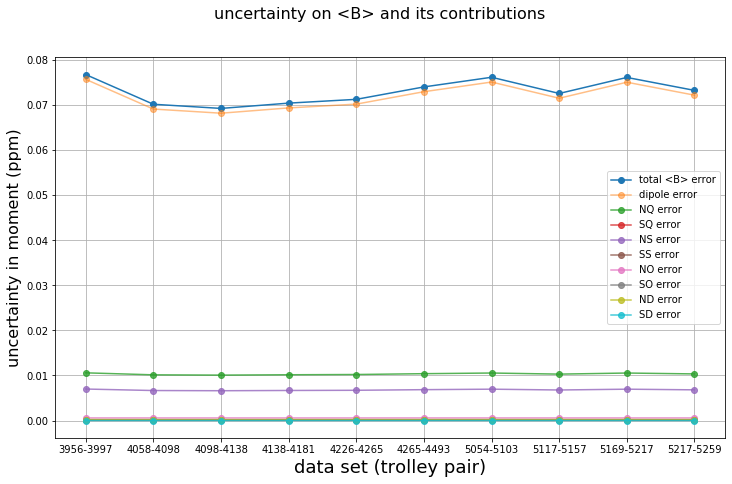

In [21]:

x = np.arange(len(flist))

#plot the moments together
y = eresult_arr
fig = plt.figure(figsize=(12,7))
plt.plot(x, y, label='total <B> error',alpha=1,marker='o')

#dipole
y = ecI_arr[0::N_moments]
plt.plot(x, y, label='dipole error',alpha=0.5,marker='o')

#quadtupole
y = ecI_arr[1::N_moments]
plt.plot(x, y, label='NQ error',alpha=0.8,marker='o')
y = esJ_arr[1::N_moments]
plt.plot(x, y, label='SQ error',alpha=0.8,marker='o')

#sextupole
y = ecI_arr[2::N_moments]
plt.plot(x, y, label='NS error',alpha=0.8,marker='o')
y = esJ_arr[2::N_moments]
plt.plot(x, y, label='SS error',alpha=0.8,marker='o')

#octopole
y = ecI_arr[3::N_moments]
plt.plot(x, y, label='NO error',alpha=0.8,marker='o')
y = esJ_arr[3::N_moments]
plt.plot(x, y, label='SO error',alpha=0.8,marker='o')

#decapole
y = ecI_arr[4::N_moments]
plt.plot(x, y, label='ND error',alpha=0.8,marker='o')
y = esJ_arr[4::N_moments]
plt.plot(x, y, label='SD error',alpha=0.8,marker='o')

fig.suptitle('Results vs run', fontsize=16)


fig.suptitle('uncertainty on <B> and its contributions', fontsize=16)
plt.grid()
plt.xlabel('data set (trolley pair)', fontsize=18)
plt.ylabel('uncertainty in moment (ppm)', fontsize=16)
plt.legend()

plt.xticks(range(len(x_names)), x_names)
plt.show()

# The pure field, without muon convolution

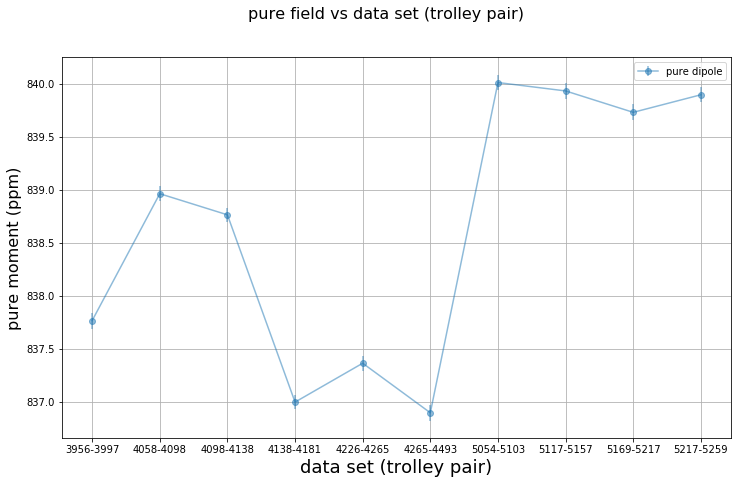

In [26]:
x = np.arange(len(flist))

#plot the moments together
fig = plt.figure(figsize=(12,7))

#dipole
y = c_arr[0::N_moments]
ey = ec_arr[0::N_moments]
plt.errorbar(x, y, ey, label='pure dipole',alpha=0.5,marker='o')


fig.suptitle('pure field vs data set (trolley pair)', fontsize=16)

plt.grid()
plt.xlabel('data set (trolley pair)', fontsize=18)
plt.ylabel('pure moment (ppm)', fontsize=16)
plt.legend()

plt.xticks(range(len(x_names)), x_names)
plt.show()

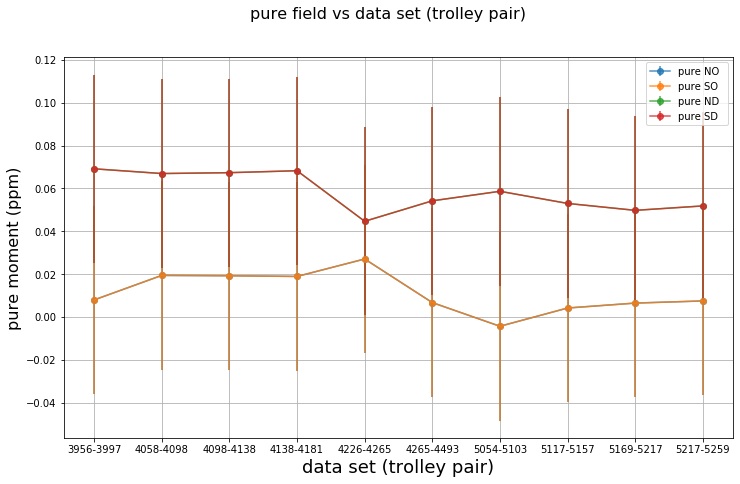

In [31]:
x = np.arange(len(flist))

#plot the moments together
fig = plt.figure(figsize=(12,7))

# #quadropole
# y = c_arr[1::N_moments]
# ey = ec_arr[1::N_moments]
# plt.errorbar(x, y, ey, label='pure NQ ',alpha=0.8,marker='o')
# y = s_arr[1::N_moments]
# ey = es_arr[1::N_moments]
# plt.errorbar(x, y, ey, label='pure SQ ',alpha=0.8,marker='o')

# #sextupole
# y = c_arr[2::N_moments]
# ey = ec_arr[2::N_moments]
# plt.errorbar(x, y, label='pure NS ',alpha=0.8,marker='o')
# y = s_arr[2::N_moments]
# ey = es_arr[2::N_moments]
# plt.errorbar(x, y, ey, label='pure SS  ',alpha=0.8,marker='o')

#octopole
y = c_arr[3::N_moments]
ey = ec_arr[3::N_moments]
plt.errorbar(x, y, ey, label='pure NO ',alpha=0.8,marker='o')
y = s_arr[3::N_moments]
ey = es_arr[3::N_moments]
plt.errorbar(x, y, ey, label='pure SO  ',alpha=0.8,marker='o')


#decapole
y = c_arr[4::N_moments]
ey = ec_arr[4::N_moments]
plt.errorbar(x, y, ey, label='pure ND ',alpha=0.8,marker='o')
y = s_arr[4::N_moments]
ey = es_arr[4::N_moments]
plt.errorbar(x, y, ey, label='pure SD  ',alpha=0.8,marker='o')

fig.suptitle('pure field vs data set (trolley pair)', fontsize=16)

plt.grid()
plt.xlabel('data set (trolley pair)', fontsize=18)
plt.ylabel('pure moment (ppm)', fontsize=16)
plt.legend()

plt.xticks(range(len(x_names)), x_names)
plt.show()

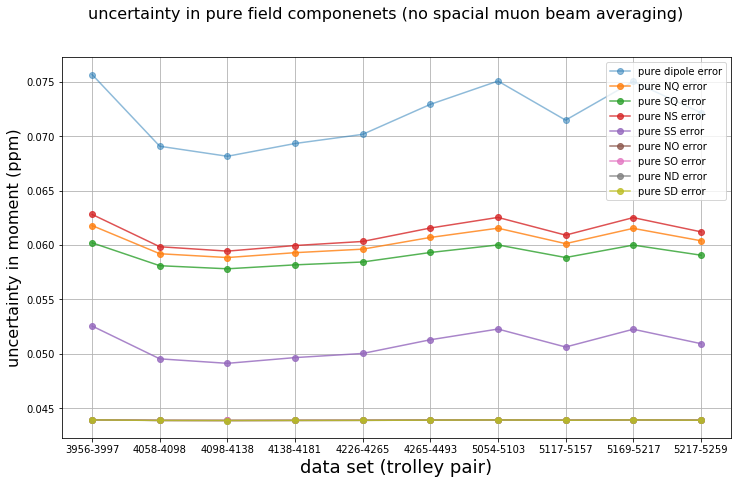

In [28]:
x = np.arange(len(flist))

#plot the moments together
fig = plt.figure(figsize=(12,7))

#dipole
y = ec_arr[0::N_moments]
plt.plot(x, y, label='pure dipole error',alpha=0.5,marker='o')

#quadropole
y = ec_arr[1::N_moments]
plt.plot(x, y, label='pure NQ error',alpha=0.8,marker='o')
y = es_arr[1::N_moments]
plt.plot(x, y, label='pure SQ error',alpha=0.8,marker='o')

#sextupole
y = ec_arr[2::N_moments]
plt.plot(x, y, label='pure NS error',alpha=0.8,marker='o')
y = es_arr[2::N_moments]
plt.plot(x, y, label='pure SS error ',alpha=0.8,marker='o')

#octopole
y = ec_arr[3::N_moments]
plt.plot(x, y, label='pure NO error',alpha=0.8,marker='o')
y = es_arr[3::N_moments]
plt.plot(x, y, label='pure SO error ',alpha=0.8,marker='o')


#decapole
y = ec_arr[4::N_moments]
plt.plot(x, y, label='pure ND error',alpha=0.8,marker='o')
y = es_arr[4::N_moments]
plt.plot(x, y, label='pure SD error ',alpha=0.8,marker='o')

fig.suptitle('uncertainty in pure field componenets (no spacial muon beam averaging)', fontsize=16)

plt.grid()
plt.xlabel('data set (trolley pair)', fontsize=18)
plt.ylabel('uncertainty in moment (ppm)', fontsize=16)
plt.legend()

plt.xticks(range(len(x_names)), x_names)
plt.show()

# junk below

dipole contribution to <B>: 
 slope= 1.0086114016266854 intercept= -7.116674621539914
cor= 0.9989279360692267 
 

dipole contribution to <B>: 
 slope= 1.044449139349977 intercept= -37.15027669007145
cor= 0.9960807554964123 
 

dipole contribution to <B>: 
 slope= 0.9729748805483192 intercept= 22.7851560268374
cor= 0.9963065428049395 
 



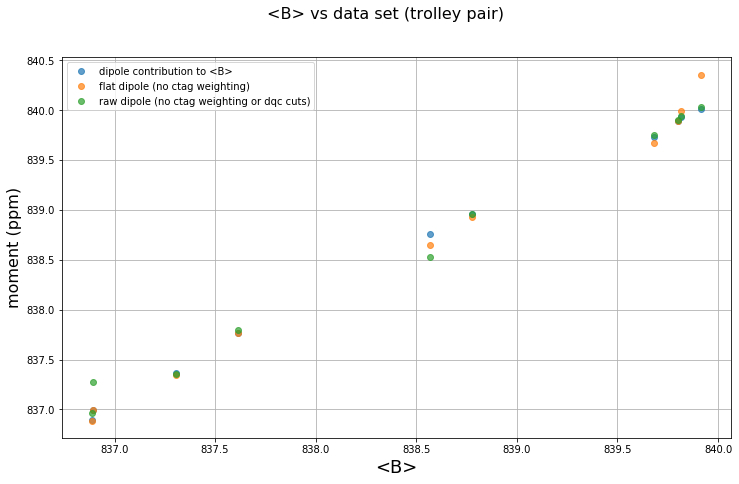

In [25]:
fig = plt.figure(figsize=(12,7))

x = result_arr



y = cI_arr[0::N_moments]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
cor = pd.Series(x).corr(pd.Series(y))
print("dipole contribution to <B>:",'\n slope=',slope,'intercept=',intercept)
print('cor=',cor,'\n \n')
plt.plot(x, y, label='dipole contribution to <B>',alpha=0.7,marker='o',linestyle='None')

#the dipole with no ctags but with dqc cuts
y = c_flat_arr[0::N_moments]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
cor = pd.Series(x).corr(pd.Series(y))
print("dipole contribution to <B>:",'\n slope=',slope,'intercept=',intercept)
print('cor=',cor,'\n \n')
plt.plot(x, y, label='flat dipole (no ctag weighting)',alpha=0.7,marker='o',linestyle='None')


#the raw dipole (no ctags or dqc cuts)
y = c_raw_arr[0::N_moments]
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
cor = pd.Series(x).corr(pd.Series(y))
print("dipole contribution to <B>:",'\n slope=',slope,'intercept=',intercept)
print('cor=',cor,'\n \n')
plt.plot(x, y, label='raw dipole (no ctag weighting or dqc cuts)',alpha=0.7,marker='o',linestyle='None')

fig.suptitle('<B> vs data set (trolley pair)', fontsize=16)
plt.grid()
plt.xlabel('<B>', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()

plt.show()